In [33]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/Wholesale customers data.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [34]:
# Display a description of the dataset
stats = data.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [35]:
# Using data.loc to filter a pandas DataFrame
data.loc[[100, 200, 300],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [36]:
# Retrieve column names
# Alternative code:
# data.keys()
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [37]:
# Fresh filter
fresh_q1 = 3127.750000
display(data.loc[data.Fresh < fresh_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [38]:
# Frozen filter
frozen_q1 = 742.250000
display(data.loc[data.Frozen < frozen_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [39]:
# Frozen
frozen_q3 = 3554.250000
display(data.loc[data.Frozen > frozen_q3, :].head(7))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916


In [40]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [43, 12, 39]

# Create a DataFrame of the chosen samples
# .reset_index(drop = True) resets the index from 0, 1 and 2 instead of 100, 200 and 300 
samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


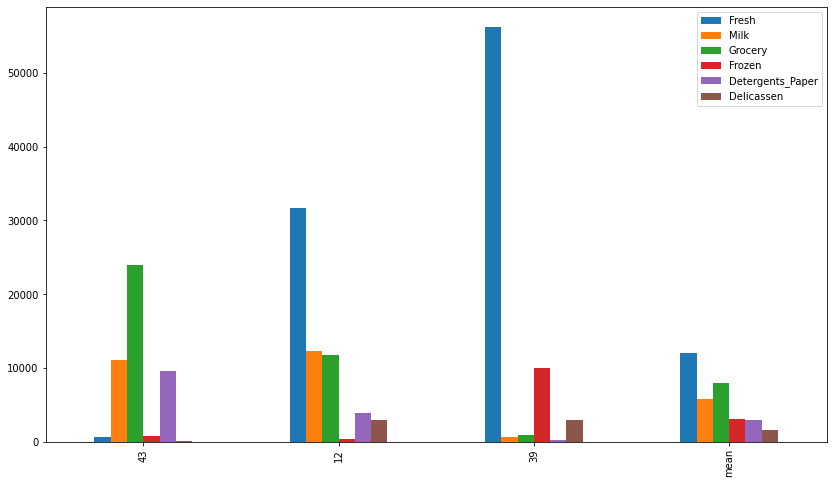

In [41]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns

# Get the means 
mean_data = data.describe().loc['mean', :]

# Append means to the samples' data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
sample_means_plot =  samples_bar.plot(kind='bar', figsize=(14,8))
fig = sample_means_plot.get_figure()
fig.savefig("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/sample_means.png")

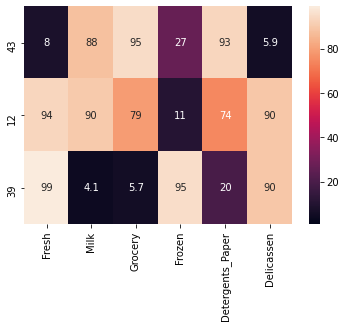

In [42]:
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
percentile_plot =  sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)
fig = percentile_plot.get_figure()
fig.savefig("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/percentile_plot.png")

****Implementation: Feature Relevance****

One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:


*   Assign new_data a copy of the data by removing a feature of your choice using the DataFrame.drop function.
*   Use sklearn.cross_validation.train_test_split to split the dataset into training and testing sets. Use the removed feature as your target label. Set a test_size of 0.25 and set a random_state.
*   Import a decision tree regressor, set a random_state, and fit the learner to the training data.
*   Report the prediction score of the testing set using the regressor's score function.









In [43]:
# Existing features
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [44]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [45]:
# Create list to loop through
dep_vars = list(data.columns)

# Create loop to test each feature as a dependent variable
for var in dep_vars:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(data.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Fresh as dependent variable: -0.38574971020407384
R2 score for Milk as dependent variable: 0.15627539501732116
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicassen as dependent variable: -2.254711537203931




*   I used a loop and predicted every single feature as a dependent variable with the results shown above.
*   As you can see, "Fresh", "Frozen" and "Delicatessen" as dependent variables have negative R2 scores.
Their negative scores imply that they are necessary for identifying customers' spending habits because the remaining features cannot explain the variation in them.
*  Similarly, "Milk" and "Detergents_Paper" have very low R2 scores. Their low scores also imply that they are necessary for identifying customers' spending habits.
*   However, "Grocery" has a R2 score of 0.68. Now this is, in my opinion, a low score. But relative to the others it is much higher.
It may be not as necessary, compared to the other features, for identifying customers' spending habits.
We will explore this further.


**Visualize Feature Distributions**

To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

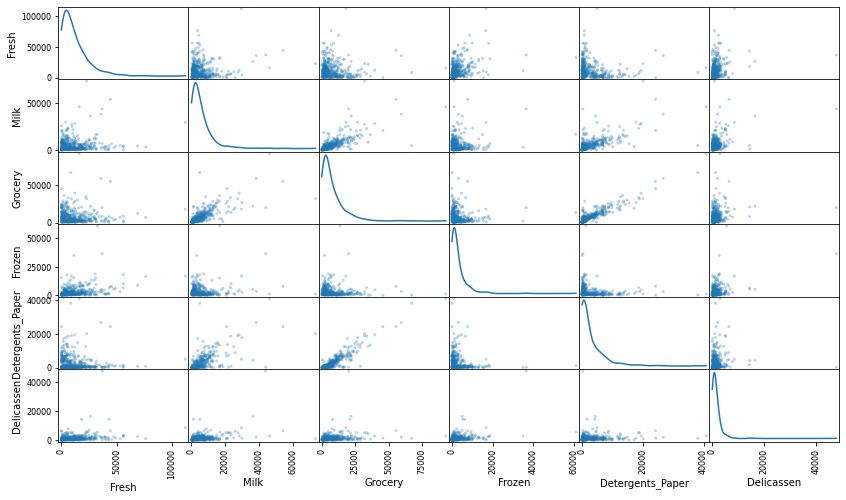

In [57]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.savefig("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/scatter_matrix_features.png")

**Correlation Matrix**


*   This is to cross-reference with the scatter matrix above to draw more accurate insights from the data.
*   The higher the color is on the bar, the higher the correlation.

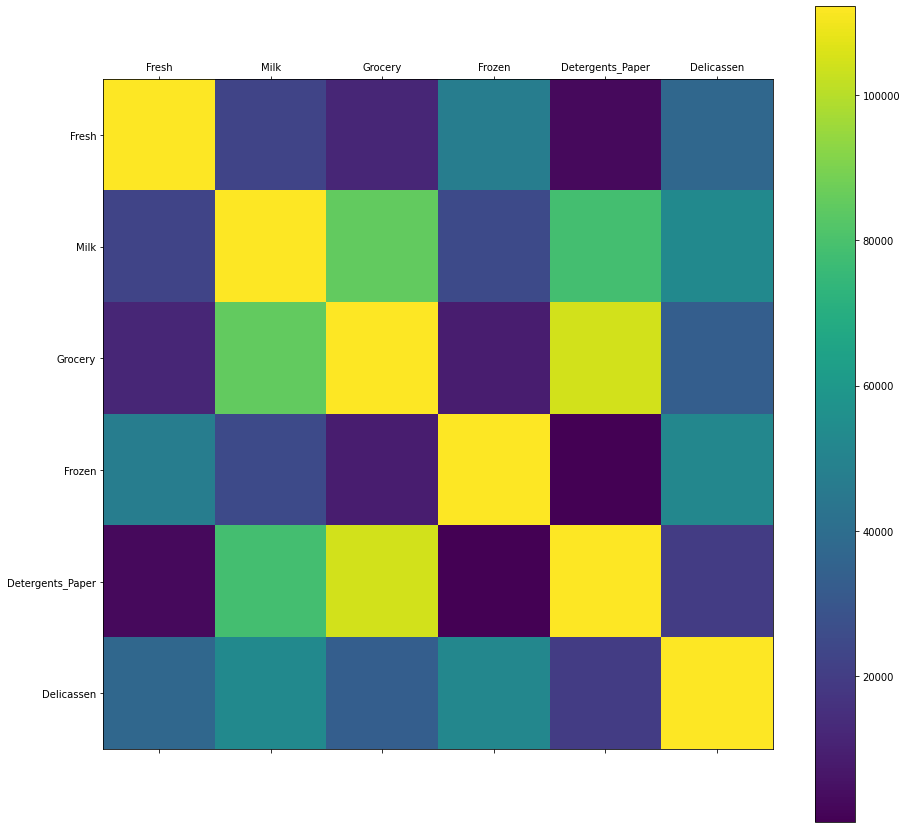

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(df,size=15):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    '''
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    corr_plot = cax.get_figure()
    fig.savefig("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/corr_plot.png")  

plot_corr(data)

I have plotted a correlation matrix to compare with the scatter matrix to ensure this answer is as accurate as possible.


*   The follow pairs of features seem to have some correlation as observed from the scatter plot showing a linear trend and the correlation plot showing a high correlation between the two features. I have ranked them in order of correlation from strongest to weakest.
> <li/>Grocery and Detergents_Paper.</li>
> <li/>Grocery and Milk.</li>
> <li/>Detergents_Paper and Milk (not too strong).</li>


*   These features that are strongly correlated does lend credence to our initial claim that Grocery may not be necessary for identifying customers' spending habits.
> <li/>Grocery has a high correlation with Detergents_Paper and Milk that corresponds to a relatively high R2 score when we regress Grocery on all other features.</li>

*   The data are not normally distributed due to the presence of many outliers.
> <li/>Evidently, most are skewed to the left where most of the data points lie.</li>
> <li/>This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.</li>

**Data Preprocessing**

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.
<br>

In the code block below, you will need to implement the following:
> <li/>Assign a copy of the data to log_data after applying a logarithm scaling. Use the np.log function for this.</li>
> <li/>Assign a copy of the sample data to log_samples after applying a logrithm scaling. Again, use np.log.</li>

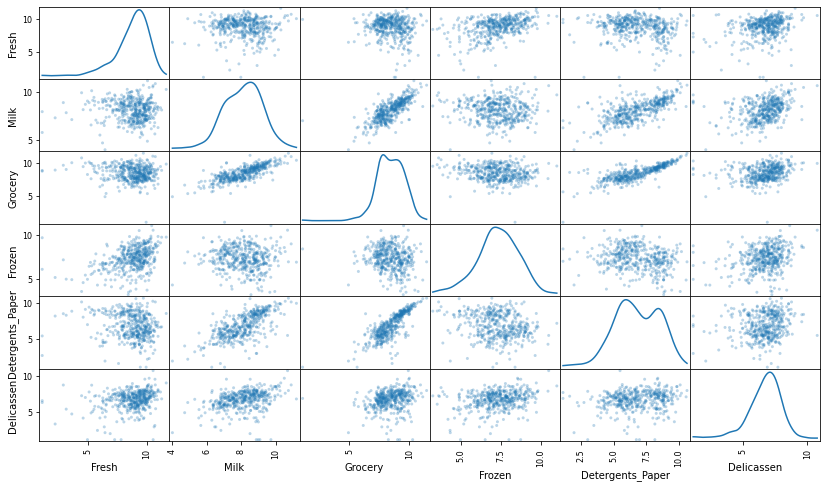

In [56]:
from pandas.plotting import scatter_matrix
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.savefig("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/scatter_matrix_log_data.png")

**Observation**

After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

In [58]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968


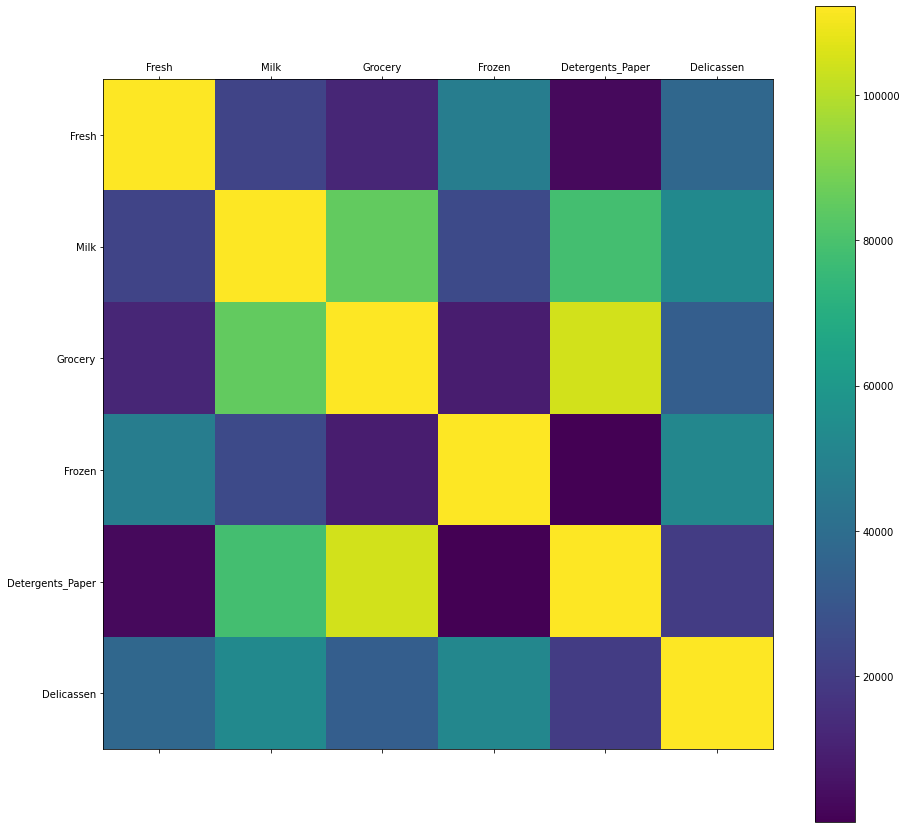

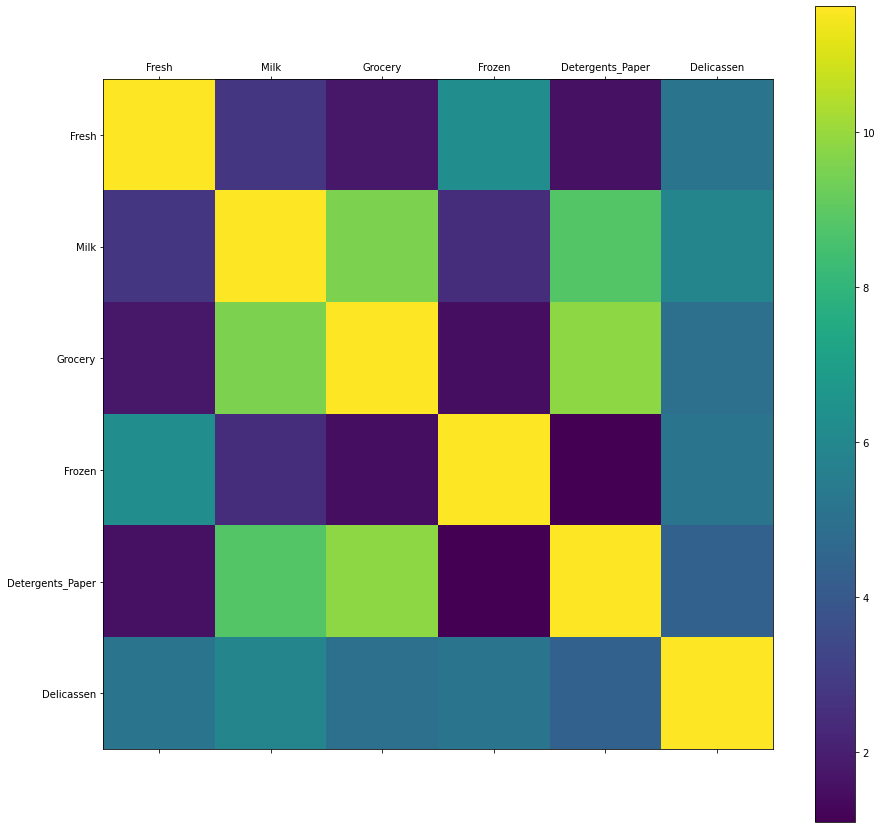

In [60]:
corr_data = plot_corr(data)
corr_log_data = plot_corr(log_data)
plt.savefig("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/corr_data.png")
plt.savefig("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/corr_log_data.png")

**Changes in correlations**


*   Grocery and Detergents_Paper has a weaker correlation.

*   Grocery and Milk has a slightly stronger correlation.
*   Detergents_Paper and Milk has a slightly stronger correlation.

**Implementation: Outlier Detection**

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.
<br>
In the code block below, you will need to implement the following:
*   Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
*   Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
*   Assign the calculation of an outlier step for the given feature to step.
*   Optionally remove data points from the dataset by adding indices to the outliers list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [61]:
# This is how np.percentile would work
# np.percentile[series, percentile]
np.percentile(data.loc[:, 'Milk'], 25)

1533.0

In [62]:
import itertools

In [64]:
# Select the indices for data points you wish to remove
outliers_lst  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.columns:
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))

    # The tilde sign ~ means not
    # So here, we're finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    # display(outliers_rows)

    outliers_lst.append(list(outliers_rows.index))

outliers = list(itertools.chain.from_iterable(outliers_lst))

# List of unique outliers
# We use set()
# Sets are lists with no duplicate entries
uniq_outliers = list(set(outliers))

# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print('Outliers list:\n', uniq_outliers)
print('Length of outliers list:\n', len(uniq_outliers))

print('Duplicate list:\n', dup_outliers)
print('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
# Only 5 specified
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print('Original shape of data:\n', data.shape)
# Processed Data
print('New shape of data:\n', good_data.shape)

Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicassen':
Outliers list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of outliers list:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of duplicates list:
 5
Original shape of data:
 (440, 6)
New shape of data:
 (435, 6)


**Notes**



*   Samples are not in this outliers' list.
*   The good data now is a matrix that measures 435 x 6 instead of the original dimensionality of 440 x 6



*   Specifically there are 5 examples that have duplicates.
> <li/>Their indices are in this array: [128, 65, 66, 75, 154].</li>
*   They should be removed as they are not only outliers in one categories but more than once.
> <li/>Hence, they are not representative of our general customers.</li>

**Abstract Summary**



*   If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier.
*   If the outlier does not change the results but does affect assumptions, you may drop the outlier. But note that in a footnote of your paper.


*   More commonly, the outlier affects both results and assumptions. In this situation, it is not legitimate to simply drop the outlier. You may run the analysis both with and without it, but you should state in at least a footnote the dropping of any such data points and how the results changed.
*   If the outlier creates a significant association, you should drop the outlier and should not report any significance from your analysis.

**Feature Transformation**

In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

**Implementation: PCA**

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.
<br>
In the code block below, you will need to implement the following:
*   Import sklearn.decomposition.PCA and assign the results of fitting PCA in six dimensions with good_data to pca.
*   Apply a PCA transformation of the sample log-data log_samples using pca.transform, and assign the results to pca_samples.

In [66]:
from sklearn.decomposition import PCA

In [134]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sklearn.decomposition import pca

def pca_results_func(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

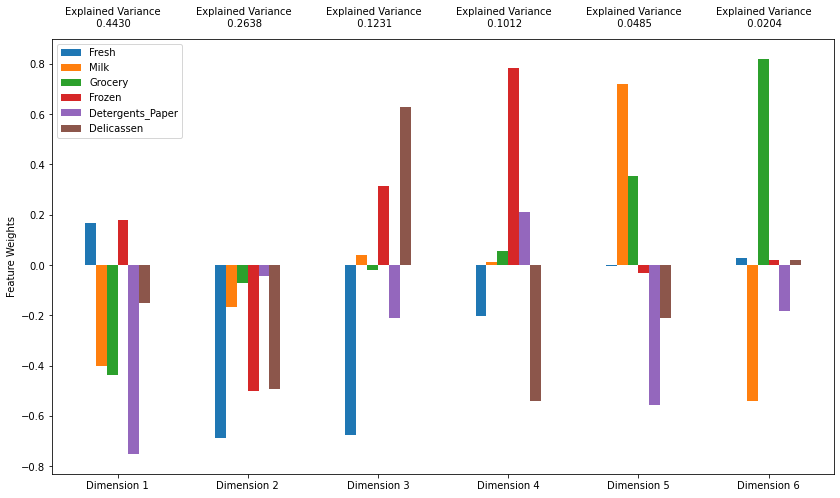

In [135]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
# Instantiate
pca = PCA(n_components=6)
# Fit
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = pca_results_func(good_data, pca)
plt.savefig("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/pca_results-weights.png")

In [75]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


pandas.core.frame.DataFrame

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

*How much variance in the data is explained in total by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*



*   70.68% of the variance in the data is explained by the first and second principal components.
*   93.11% of the variance in the data is explained by the first four principal components.


*   Components breakdown:
><li/>The first principal component (PC1):</li>
> > An increase in PC1 is associated with large increases in "Milk", "Grocery" and "Detergents_Paper" spending.<br>
> > These features best represent PC1.<br>
> * This is in line with our initial findings where the 3 features are highly correlated.<br>
><li/>The second principal component (PC2):</li>
> > An increase in PC2 is associated with large increases in "Fresh", "Frozen" and "Delicatessen" spending.<br>
> > These features best represent PC2.<br>
> > This makes sense as PC1 represents different features. And in PC2, the features in PC1 have very small positive weights.<br>
><li/>The third principal component (PC3):</li>
> > An increase in PC3 is associated with a large increase in "Delicatessen" and a large decrease in "Fresh" spending.<br>
> > These features best represent PC3.<br>
><li/>The fourth principal component (PC4):</li>
> > An increase in PC4 is associated with a large increasing in "Frozen" and a large decrease in "Delicatessen" spending.<br>
> > These features best represent PC4.<br>

**Observation**

In [77]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.1072,2.7017,-0.6386,1.8708,0.6452,0.1333
1,-2.2406,-1.2419,-1.0729,-1.9589,0.2160,-0.1782
2,3.0426,-2.5854,0.1965,-0.0757,-1.4213,0.0093


**Implementation: Dimensionality Reduction**

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.
In the code block below, you will need to implement the following:
*   Assign the results of fitting PCA in two dimensions with good_data to pca.

*   Apply a PCA transformation of good_data using pca.transform, and assign the reuslts to reduced_data.
*   Apply a PCA transformation of the sample log-data log_samples using pca.transform, and assign the results to pca_samples.

In [78]:
# TODO: Apply PCA by fitting the good data with only two dimensions
# Instantiate
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

**Observation**

In [79]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.1072,2.7017
1,-2.2406,-1.2419
2,3.0426,-2.5854


**Clustering**

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.

**K-Means Clustering Algorithm**


*   Intuition: points in the same cluster has shorter than points from other clusters.
> The goal is to minimize the distance within the same cluster.
*   Hard assignment
> Points belong explicitly to clusters
*   Advantages
> Easy to understand and implement.<br>
> Works well in practice.<br>
*   Disadvantages
> It may converge to a local optima depending on your initialization of clusters.We can initialize multiple times.<br>
> It may be computationally expensive to compute Euclidean distances. Yet we can easily use batch K-means to solve this.<br>
> It is susceptible to outliers. We can pre-process our data to exclude outliers to solve this.<br>
<br>

**Gaussian Mixture Model**
*   Soft assignment
> There is no definite assignment of points to clusters.<br>
> Points have probabilities of belonging to clusters.<br>
*   Advantages
> There is greater flexibility due to clusters having unconstrained covariances. In fact, K-means is a special case of the Gaussian Mixture Model.<br>
> It allows mixed memberships. Due to the nature of soft assignments, a point can belong to two clusters with varying degree (probability).<br>
*   Disadvantages
> It may converge to a local optima depending on your initialization of clusters. We can initialize multiple times.<br>
> It is a much more complicated model to interpret.<br>

<br>

**Due to how there may be a mixed membership problem in our dataset where there is no clear demarcation, I believe we should start with the Gaussian Mixture Model**

**Implementation: Creating Clusters**

Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

<br>

In the code block below, you will need to implement the following:
*   Fit a clustering algorithm to the reduced_data and assign it to clusterer.

*   Predict the cluster for each data point in reduced_data using clusterer.predict and assign them to preds.

*   Find the cluster centers using the algorithm's respective attribute and assign them to centers.

*   Predict the cluster for each sample data point in pca_samples and assign them sample_preds.


*   Import sklearn.metrics.silhouette_score and calculate the silhouette score of reduced_data against preds.
> Assign the silhouette score to score and print the result.



In [82]:
# Imports
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [83]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [90]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.37598604546578707
For n_clusters = 3. The average silhouette_score is : 0.342254608880423
For n_clusters = 4. The average silhouette_score is : 0.3333690515150672
For n_clusters = 5. The average silhouette_score is : 0.18558229390989633
For n_clusters = 6. The average silhouette_score is : 0.20732275701829128
For n_clusters = 7. The average silhouette_score is : 0.28619085821671697
For n_clusters = 8. The average silhouette_score is : 0.2971907733655427
For n_clusters = 9. The average silhouette_score is : 0.3240845995533817
For n_clusters = 10. The average silhouette_score is : 0.2874618786398547


In [91]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(reduced_data)
        bic.append(gmm.bic(reduced_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

**KNN Implementation**

In [93]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.42628101546910835
For n_clusters = 3. The average silhouette_score is : 0.39689092644980506
For n_clusters = 4. The average silhouette_score is : 0.3327470971178821
For n_clusters = 5. The average silhouette_score is : 0.34965746976563555
For n_clusters = 6. The average silhouette_score is : 0.36345263563806646
For n_clusters = 7. The average silhouette_score is : 0.3652222677589196
For n_clusters = 8. The average silhouette_score is : 0.3668155159902795
For n_clusters = 9. The average silhouette_score is : 0.36184170252674996
For n_clusters = 10. The average silhouette_score is : 0.3301874805559962


**Distance Metric**



*   The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. Therefore, it makes sense to use the same distance metric here as the one used in the clustering algorithm. This is Euclidean for KMeans and Mahalanobis for general GMM.



**Metric for GMM**

*   BIC could sometimes be a better criterion for deciding on the optimal number of clusters.



**GMM** <br >
For n_clusters = 2. 
> The average silhouette_score is : 0.37598604546578707 <br>
For n_clusters = 3. 
> The average silhouette_score is : 0.342254608880423 <br >
For n_clusters = 4. 
> The average silhouette_score is : 0.3333690515150672 <br >
For n_clusters = 5. 
>The average silhouette_score is : 0.18558229390989633 <br >
For n_clusters = 6. 
>The average silhouette_score is : 0.20732275701829128 <br >
For n_clusters = 7. 
>The average silhouette_score is : 0.28619085821671697 <br >
For n_clusters = 8. 
>The average silhouette_score is : 0.2971907733655427 <br >
For n_clusters = 9. 
>The average silhouette_score is : 0.3240845995533817 <br >
For n_clusters = 10. 
>The average silhouette_score is : 0.2874618786398547

**The best score is obtained when the number of clusters is 2. Similarly, when we use KMeans, the best score is also obtained with the same number of clusters.**

**Cluster Visualization**

In [95]:
# Extra code because we ran a loop on top and this resets to what we want
clusterer = GaussianMixture(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

In [131]:
def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	cluster_plot = ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x')
	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


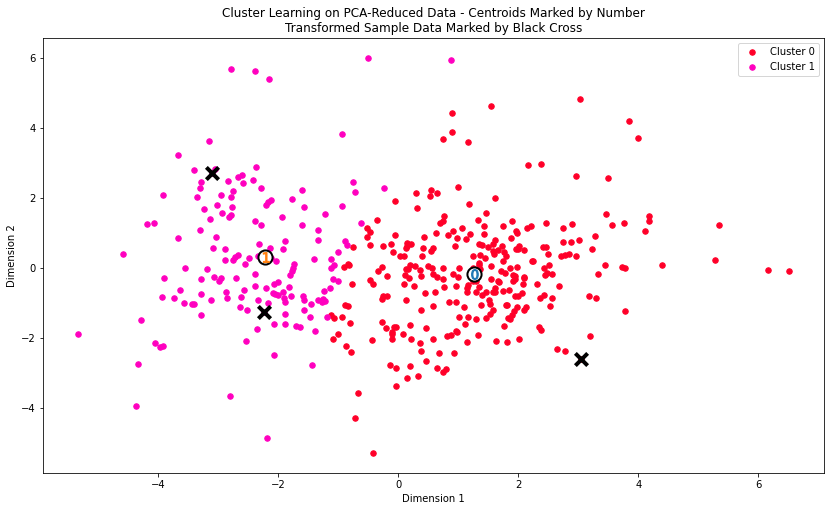

In [132]:
# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)
plt.savefig("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/cluster-results.png")

**Implementation: Data Recovery**

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.
<br>
In the code block below, you will need to implement the following:


*   Apply the inverse transform to centers using pca.inverse_transform and assign the new centers to log_centers.
*   Apply the inverse function of np.log to log_centers using np.exp and assign the true centers to true_centers.



In [100]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. What set of establishments could each of the customer segments represent?
<br>
 A customer who is assigned to 'Cluster X' should best identify with the establishments represented by the feature set of 'Segment X'.

In [102]:
# Clusters' deviation from median
display(true_centers - data.median())

# Clusters' deviation from mean
# As you can see, this is not a meaningful comparison for Segment 0 where everything is negative
display(true_centers - data.mean())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,449.0,-1513.0,-1990.5,549.0,-463.5,-233.5
Segment 1,-4952.0,4210.0,7463.5,-656.0,3879.5,-3.5


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,-3047.297727,-3682.265909,-5186.277273,-996.931818,-2528.493182,-792.870455
Segment 1,-8448.297727,2040.734091,4267.722727,-2201.931818,1814.506818,-562.870455




*   We will be using deviations from the median, with reference to the statistical description of the dataset at the beginning of this project, since mean is sensitive to outliers and would not yield meaningful comparisons.
*   Segment 0:
> Establishments in this segment have above median spending on "Fresh" and "Frozen". <br>
This could represent typical retailers such as markets specializing in fresh and frozen food. <br>
This is typical in seafood or meat markets.
*   Segment 1:
> Establishments in this segment have above median spending on "Milk", "Grocery" and "Detergents_Paper". <br>
This could represent restaurants and cafes.

In [104]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [105]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


**Observation for samples**

*   Sample 1:
> It is evident that this belongs to cluster 1 (segment 1) where spending on "Milk", "Grocery" And "Detergents_Paper" is low.<br>
*   Sample 2:
> This is tricky. The spending on "Milk", "Grocery" and "Detergents_Paper" is high. But spending on "Fresh" is high too.<br>
Considering spending on "Frozen" is low, I guess it makes sense to cluster it under cluster 1. <br>
*   Sample 3:
> It is evident that this belongs to cluster 0 because spending on "Fresh" and "Frozen" is high.<br>





**Conclusion**

<br>

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the customer segments, may be affected differently by a specific delivery scheme. 
<br> 

Next, you will consider how giving a label to each customer (which segment that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the customer segments to a hidden variable present in the data, to see whether the clustering identified certain relationships.

**Problem Statement**
<br>

Companies will often run A/B tests when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. 
<br>
The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively.
<br>
How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Solution**
<br>
*   Impact on Segment 0:
> One would surmise that Segment 0's customers would have a substantial impact by the change in delivery service. <br>
> This is because their products are highly perishable such as "Fresh" products including fruits, vegetables, seafood and meat. <br>
*   Impact on Segment 1:
> Intuitively, the impact on Segment 1's customers should be minimal. <br>
> This is because their products are mainly non-perishable products from "Grocery" to "Detergents_Paper". <br>
> However this situation is complicated as this segment has high spending on "Milk" products which is perishable. <br>
> But with advances in preservation, most "Milk" products last more than a week these days. <br>
*   We can formalize the impact by running an experiment to determine which group of customers would have the greatest impact.
> > Randomly sample 4 groups where we sample 2 groups from each cluster. <br>
> > -->Group 0a, 0b would be the group experiencing the change and the control group respectively for cluster 0.<br>
> > -->Group 1a, 1b would be the group experiencing the change and the control group respectively for cluster 1.<br>
> > We will change the schedules for group 0a and 1a keeping the schedules for 0b and 1b unchanged.<br>
> > We will have 2 metrics.<br>
> > -->We will conduct customer satisfaction survey for all groups.<br>
> > -->We will cross-reference their satisfaction level with their spending.<br>
> > Clients experiencing a negative impact would have a low satisfaction level and a decreased or similar spending. And clients experiencing a positive impact would have a high satisfaction level and an increased or similar spending.<br>
> > -->We can investigate anomalies where clients display contradictory signals like expressing a low satisfaction level and increasing spending, and vice versa.<br>

**Problem Statement**
<br>
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a customer segment it best identifies with (depending on the clustering algorithm applied), we can consider 'customer segment' as an engineered feature for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a customer segment to determine the most appropriate delivery service.
<br>
How can the wholesale distributor label the new customers using only their estimated product spending and the customer segment data?
<br>

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Solution**
<br>
*   You could use support vector machines, naive bayes, logistic regression or any other suitable classifier to classify the new clients based on their features.
> 0: cluster 0. <br>
> 1: cluster 1. <br>
*   Target variable would be the cluster group.

**Visualizing Underlying Distributions**
<br>
At the beginning of this project, it was discussed that the 'Channel' and 'Region' features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the 'Channel' feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

In [112]:
def channel_results(reduced_data, outliers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
	Data is labeled by "Channel" and cues added for student-selected sample data
	'''

	# Check that the dataset is loadable
	try:
	    full_data = pd.read_csv("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/Wholesale customers data.csv")
	except:
	    print("Dataset could not be loaded. Is the file missing?")
	    return False

	# Create the Channel DataFrame
	channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
	channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
	labeled = pd.concat([reduced_data, channel], axis = 1)
	
	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned Channel
	labels = ['Hotel/Restaurant/Cafe', 'Retailer']
	grouped = labeled.groupby('Channel')
	for i, channel in grouped:   
	    channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
	    
	# Plot transformed sample points   
	for i, sample in enumerate(pca_samples):
		ax.scatter(x = sample[0], y = sample[1], \
	           s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
		ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

	# Set plot title
	ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

In [113]:
dup_outliers

[128, 65, 66, 75, 154]

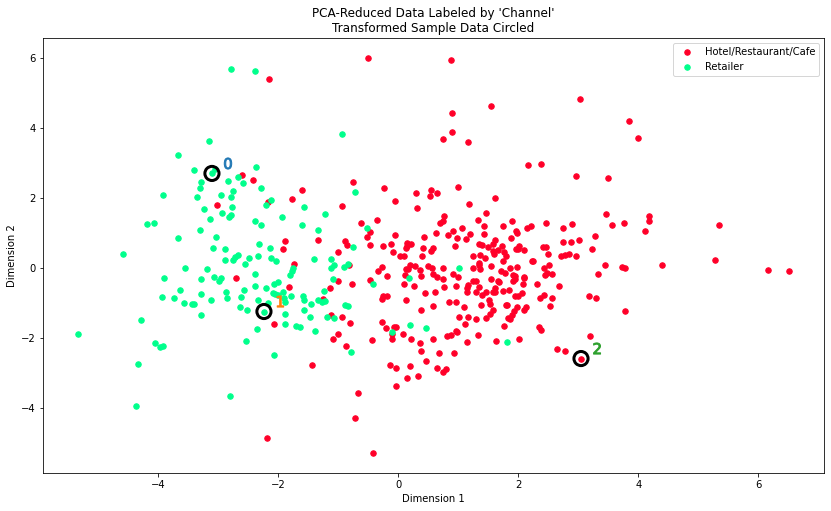

In [136]:
# Display the clustering results based on 'Channel' data
channel_results(reduced_data, dup_outliers, pca_samples)
plt.savefig("/content/drive/MyDrive/Dataset/clustering-customer-sales-data/channel_results.png")

**Problem Statement**
<br>

How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
<br>

Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
<br>

Would you consider these classifications as consistent with your previous definition of the customer segments?

**Solution**
<br>

*   The number of clusters is consistent with the underlying distribution with 2 major clusters hence the clustering algorithm did well.
*   There are customer segments that would be purely classified as "Retailers" or "Hotels/"Restaurants/Cafes" on the extreme left and right accordingly.
*   This underlying classification is consistent with our observation where we noted cluster 0 customers are typically restaurants and cafes and cluster 1 customers are typically markets.

